# Linear Regression


$$\begin{align*}
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
\end{align*}$$

A weighted sum of the input features, plus a constant called the bias term (also called the intercept term)

Vectorized form
$$
\begin{align*}
\hat{y} = h_\theta(\mathbf{x}) = \mathbf{\theta} \cdot \mathbf{x}
\end{align*}
$$

- $\mathbf{\theta}$: model's parameter vector, containing the bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$
- $\mathbf{x}$ is the instance's feature vector. containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $\mathbf{\theta} \cdot \mathbf{x}$ is the dot product of the vectors $\theta$ and $x$, which is of course equal to $\theta_0x_0+\theta_1x_1+\theta_2x_2 \dots +\theta_nx_n $
- $h_0$: hypothesis function.

In order to train a Linear Regression model, we need a measure of how well the model fits the training data. In practice, it is simpler to minimiye the Mean Square Error (MSE) than the Root Mean Square Error (RMSE).

$$
\begin{align*}
MSE(\mathbf{X}, h_\theta) = \frac{1}{m}\sum_{i=1}^{m}\left(\mathbf{\theta^T}\mathbf{x}^{(i)}-y^{(i)}\right)^2
\end{align*}
$$


## The Normal Equation

There is a mathematical equation that gives the result directly.

$$\begin{align*}
\hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
\end{align*}
$$

How we can calculate the normal equation:

$$\begin{aligned}
J_\theta &= (X\theta-y)^T(X\theta-y) \\
\frac{\partial{J_\theta}}{\partial(\theta)} &= \frac{\partial}{\partial{\theta}}((X\theta-y)^T(X\theta-y)) \\
&=2X^TX\theta - 2X^Ty \\
Cost'(\theta) &= 0 \\ 
2X^TX\theta - 2X\theta^Ty &= 0 \\
2X^TX\theta &= 2X^Ty \\
(X^TX)^{-1}(X^TX)\theta &= (X^TX)^{-1}(X^Ty) \\
\theta &= (X^TX)^{-1}(X^Ty)
\end{aligned}$$


Let's test this normal equation

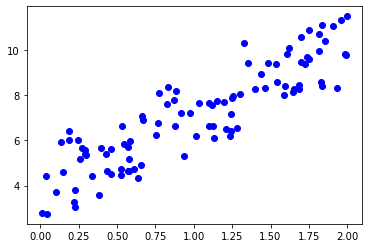

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "bo")

In [10]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[3.84563817],
       [3.22768332]])

In [15]:
np.ones((2, 1))

array([[1.],
       [1.]])

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

array([[1., 0.],
       [1., 2.]])

In [19]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84563817],
       [10.30100482]])

In [49]:
X_new

array([[0],
       [2]])

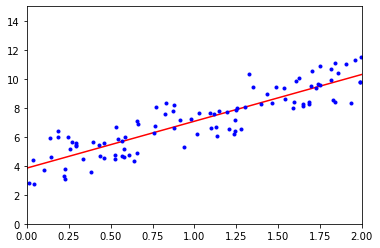

In [21]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.84563817]), array([[3.22768332]]))

In [24]:
lin_reg.predict(X_new)

array([[ 3.84563817],
       [10.30100482]])

The LinearRegression class is based on the scipy.linalg.lstsq() function.

In [26]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.84563817],
       [3.22768332]])

This function computes $\hat{\theta} = X^+y$, where $X^+$ is the pseudoinverse of X.

In [27]:
np.linalg.pinv(X_b).dot(y)

array([[3.84563817],
       [3.22768332]])

## Computational Complexity

The computational complexity of inverting $X^TX$ is typically about $O(n^{2.4})$ to $O(n^3)$, depending on the implementation. 

Now we will look at a very different way to train a Linear Regression model, which is better suited for cases where there are a large number of features or too many training instances to fit in memory.

# Gradient Descent

You start by filling $\theta$ with random values. Then you improve it gradually, takinig on bay step at a time, each step attempting to decrease the cost function, until the algorithm converges to a minimum.

The MSE cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. It is also a continous function with a slope that never changes abruptly. Gradient Descent is guaranteed to approach arbitrarily close the global minimum.

Notice: When using Gradient Descent, you should ensure that all features have a similar scale, or else it will take much longer to converge.

## Batch Gradient Descent

Partial derivatives of the cost function:

$$
\frac{\partial}{\partial{\theta_j}}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})x_j^{(i)}
$$

$$
\nabla_{\theta}MSE(\theta) = 
\begin{pmatrix}
    \frac{\partial}{\partial{\theta_0}}MSE(\theta) \\
    \frac{\partial}{\partial{\theta_1}}MSE(\theta) \\
    \vdots \\
    \frac{\partial}{\partial{\theta_n}}MSE(\theta)
\end{pmatrix} = \frac{2}{m}X^T(X\theta-y)
$$

This formula involves calculations over the full training set X, at each Gradient Descent step. This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step.

Terribly slow on large training sets.

It scales well with the number of features, faster than using the normal equation or SVD(Singular Value Decomposition) decomposition.

Gradient Descent Step

$$\theta^{(next step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$$

$\eta$: learning rate, determin the size of the downhill step

In [32]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1)

In [33]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [34]:
theta

array([[3.84563817],
       [3.22768332]])

Exactly what the Normal Equation found.

## Stochastic Gradient Descent

Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.

Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. The value is not optimal

Use a *learning schedule* to make the learning rate smaller and smaller.

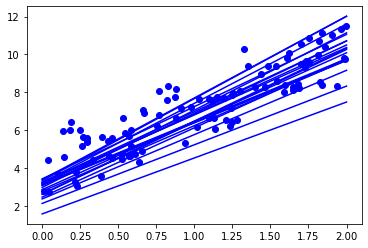

In [57]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)
count = 0
plt.plot(X, y, "bo")
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        if count < 20:
            plt.plot(X_new, X_new_b.dot(theta), "b-")
            count += 1
plt.show()

In [42]:
theta

array([[3.79250865],
       [3.22758967]])

To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the SGDRegressor class. It does not use any regularization


In [58]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [59]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.85953311]), array([3.28804138]))

## Mini-batch Gradient Descent

At each step, instead of computing the gradients based on the full training set or based on just one instance, Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

|Algorithm|Large m| Out-of-core Support | Large n| Hyperparams | Scaling required | Scikit-Learn|
|---------|-------| --------------------| -------|-------------|------------------|-------------|
|Normal Equation | Fast | No | Slow | 0 | No | N/A |
|SVD | Fast | No | Slow | 0 | No | Linear Regression |
|Batch GD | Slow | No | Fast | 2 | Yes | SGDRegressor |
|Stochastic GD | Fast | Yes  | Fast | >=2 | Yes | SGDRegressor |
|Mini-batch GD | Fast | Yes | Fast | >=2 | Yes | SGDRegressor |


# Polynomial Regression

In [74]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [76]:
X[0]

array([-2.12587842])

In [77]:
X_poly[0]

array([-2.12587842,  4.51935904])

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

(array([2.07130873]), array([[0.93318576, 0.50370097]]))

In [100]:
lin_reg.coef_.ravel()

array([0.93318576, 0.50370097])

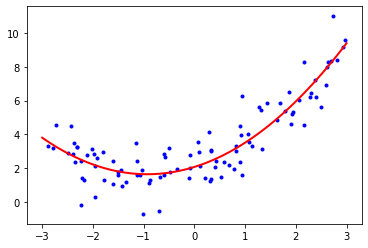

In [117]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.show()

In [112]:
y_new

array([ 5.21790321,  2.03338906,  2.33122589,  3.0390799 ,  5.50283647,
        3.43291619,  6.53340759,  4.17330148,  3.68600016,  4.87113027,
        2.00953197,  6.56740035,  2.10070763,  3.65952237,  2.17680599,
        2.43426641, 11.74173594,  2.15514284,  9.1062502 ,  2.10999943,
        2.34918614, 10.87886668,  2.6963309 ,  9.83480577,  6.05260498,
       10.16397134,  2.33169259,  4.72559915,  7.06067558,  5.88643152,
        2.51991326,  2.54701978,  2.04352151,  3.43364769,  2.45303138,
        2.34221365,  3.31286771,  8.38256687,  2.59588936,  2.11581416,
        2.70796086,  5.38671848,  2.21113167,  5.40530287,  2.11912082,
        8.09365547,  4.25547614,  6.12534432, 11.58681643,  7.50703032,
        2.84360323, 10.44046288,  3.12242586,  2.61192815,  2.1413948 ,
        3.29574008,  3.28209922,  2.35723306,  4.35740861,  9.78392399,
        3.10412594,  2.0291001 ,  7.50667895,  8.68246008,  9.63444981,
        6.40157368,  2.31895921,  4.64272634,  5.91822404,  6.33

# Learning Curve
To tell if your model is overfitting or underfitting, you can look at the learning curves.

In [126]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

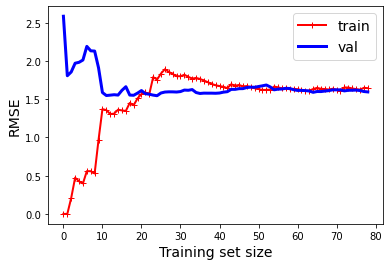

In [127]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

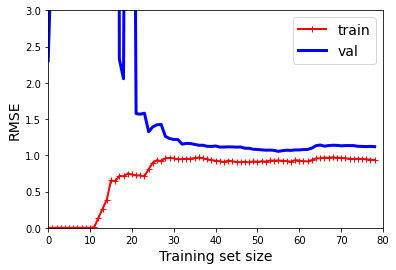

In [129]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
    ("lin_reg", LinearRegression()),
]) 
plt.axis([0, 80, 0, 3])   
plot_learning_curves(polynomial_regression, X, y)

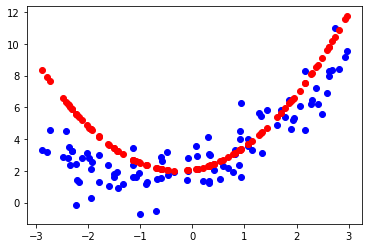

In [114]:
plt.plot(X, y, "bo")
plt.plot(X, y_new, "ro")

# Regularized Linear Models



## Ridge Regression

Force the model to keep the weights as small as possible

Ridge Regression cost function
$$
J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2
$$

In [134]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.97060995]])

In [135]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.95408399])

## Lasso Regression

Least Absolute Shrikage and Selection Operator Regression.

$$
J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}|\theta_i|
$$

In [136]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.92314641])

In [137]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.94743337])

## Elastic Net

$$
J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_i| + \frac{1-r}{2}\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2 
$$

In [138]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.92453786])

## Early Stopping

With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

# Logistic Regression

Estimated probability is > 50%: belongs to that class
Estimated probability is <= 50%: does not belong to that class

## Estimating Probabilities

$$\hat{p} = h_\theta(\mathbf{x}) = \sigma_(\mathbf{x}^T\theta) $$

$\sigma$ is a sigmoid function. It outputs a number between 0 and 1.

$$\sigma(t) = \frac{1}{1+exp(-t)}$$

(-10.0, 10.0, -0.1, 1.1)

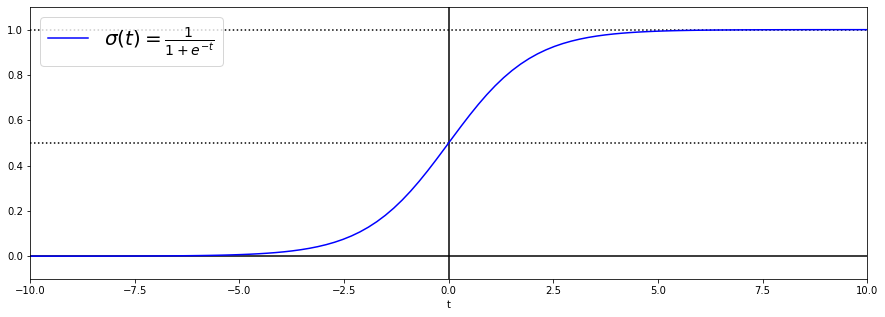

In [161]:
x = np.linspace(-10, 10, 100).reshape(100, 1)
y = 1 / (1 + np.exp(-x))
plt.figure(figsize=(15, 5))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([0, 0], [-0.1, 1.1], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1.0, 1.0], "k:")
plt.plot(x, y, "b-", label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10,-0.1, 1.1])

## Training and Cost Function

Cost funciton of a single training instance:

$$\begin{equation*}
c(\theta) =
  \begin{cases}
    -log(\hat{p})   & \quad \text{if } y = 1\\
    -log(1-\hat{p}) & \quad \text{if } y = 0
  \end{cases}
\end{equation*}
$$


How it makes sense?

When p approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estmiates a probability close to 1 for a negative instance. On the other hand, -log(p) is close to 0 when p is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.


Logistic Regression cost function:

$$
J(\theta) = - \frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})]
$$

Partial derivatives

$$
\frac{\partial}{\partial{\theta_j}}J(\theta) = \frac{1}{m}\sum_{i=1}^m(\sigma(\theta^Tx(i))- y^{(i)})x_j^{i}
$$

How we calculate the derivatives:
https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression

Hint: $log(x) + log(y) = log(xy)$


## Decision Boundatries

Build a classifier with Iris data.

In [162]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [164]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [165]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

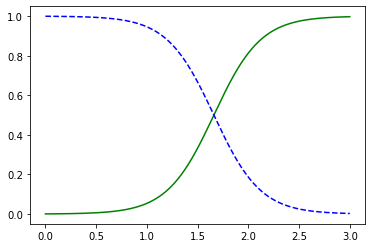

In [170]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

## Softmax Regression

The Logistic Regression model can be generalized to support mulitple classes directly, without having to train and combine mulitple binary classifiers. This is called Softmax Regression.

$$
J(\Theta) = - \frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{K}y_k^{(i)}log(\hat{p}_k^{(i)})
$$

$y_k^{(i)}$ is the target probability that the ith instance belongs to class k. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.

This cost function called Cross Entropy. It penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

Let's use Softmax Regression to classify the iris flowers into all three classes.

In [171]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [172]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])